# <u>Lab 5 Curve Fitting - Dana Lucas</u>

## Introduction

The ability to analyze and describe data is an important skill for physicists. The basic structure for curve fitting a dataset involves importing and unpacking the data, writing a definition that describes the general form of the data, whether that is linear, power, exponential or sinusoidal, and fitting the data to that specific curve shape. 


## Exercise 1: Linear Fit

The graph produced from the calibration data of a rotational sensor and position is shown in the figure below, simulating a linear curve fit. In python, the general form of the linear equation fit was entered as:

        y=mx+b

where m is the slope and b is the y-intercept.


slope = 7.455 +/- 0.277
intercept = -1.818 +/- 1.639


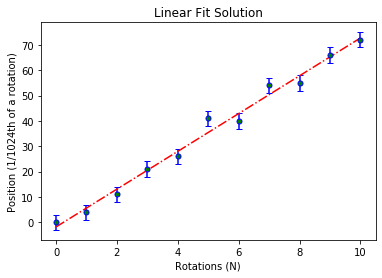

In [2]:
from pylab import *
from scipy.optimize import curve_fit

# Linear Curve Fit definition
def line(x,m,b):
    y=m*x+b
    return y

def createGraph(file,curvefit,guess,graphtitle,xaxis,yaxis):
    
    # Load data
    x,y = loadtxt(file,unpack=True)
    
    # Perform the curve fit and separate variables
    parameters,covariance = curve_fit(curvefit,x,y,p0=guess,sigma=None)
    m = parameters[0]
    b = parameters[1]
    dm = sqrt(covariance[0,0])
    db = sqrt(covariance[1,1])
    
    # Print parameter data
    print("slope = %0.3f +/- %0.3f" % (m,dm))
    print("intercept = %0.3f +/- %0.3f" % (b,db))
    
    # Create list for size of each error bar
    yerrors = array([3.0 for j in range(len(x))]) # size of error bars
    
    # Place the error bars on the graph
    errorbar(x,y,yerr=yerrors,fmt='bo',ms=5,capsize=3,mfc='g')
    
    # Plot the graph
    plot(x,line(x,parameters[0],parameters[1]),'r-.')
    title(graphtitle)
    xlabel(xaxis)
    ylabel(yaxis)
    show()

# Call the definition to plot the linear fit graph
createGraph("calibration.txt",line,[1,1],'Linear Fit Solution','Rotations (N)','Position (1/1024th of a rotation)')

The data shows that the slope of the best fit line is 7.455 with uncertainty of 0.277 and the y-intercept is -1.818 with uncertainty of 1.639. If the sensor was calibrated, the slope of this line would be 0 because the positiojn of the sensor will not move. However, the graph shows a linear line with a positive slope, signifying that the sensor is miscalibrated. By analyzing the graph, it can be seen that the sensor is off by around 7.5.

## Exercise 2: Power Fit

A power curve fit was created from data of a rotating point mass’s angular velocity and the force needed to keep it in circular motion. It is expected that the data follows the centripetal force equation which is:

        F_c=mRω^2
        
        where
        F_c is the centripetal force,
        m is the mass,
        R is the radius, and
        ω is the angular velocity

The curve fit shown below, therefore, follows the general form of

        y=ax^b

where a is the scale factor and b is the power. By comparing the two equations, it would be expected that the power would be 2 and that the scale factor would be equal to the mass multiplied by the radius.


scale = 0.033 +/- 0.004
power = 2.010 +/- 0.104


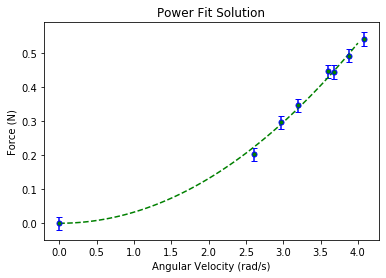

In [4]:
from pylab import *
from scipy.optimize import curve_fit
import numpy as np

# Power curve definition
def power(x,a,b):
    y=a*(x**b)
    return y

# Load data
x,y,error = loadtxt("centripetal.txt",unpack=True)

# Sort the data into increasing order
sortlist = sorted(list(zip(x,y,error)))
sorted_x,sorted_y,sorted_error=zip(*sortlist)
    
# Make a guess as to what the parameters should be
guess = array([0.1,2])

# Perform the curve fit and separate variables
parameters,covariance = curve_fit(power,sorted_x,sorted_y,p0=guess,sigma=sorted_error)
a = parameters[0]
b = parameters[1]
da = sqrt(covariance[0,0])
db = sqrt(covariance[1,1])

# Print parameter data
print("scale = %0.3f +/- %0.3f" % (a,da))
print("power = %0.3f +/- %0.3f" % (b,db))

# Create list for size of each error bar
yerrors = array([0.0196 for j in range(len(x))])

# Place the error bars on the graph
errorbar(sorted_x,sorted_y,yerr=yerrors,fmt='bo',ms=5,capsize=3,mfc='g')

# Plot the graph (use numpy to create a list of many points in between 0 and 4, not just those few points that are given)
plot(np.linspace(0,4,100),power(np.linspace(0,4,100),a,b),'g--')
title('Power Fit Solution')
xlabel('Angular Velocity (rad/s)')
ylabel('Force (N)')
show()

It was found that the scale factor of this power fit was 0.033 and the power was approximately 2. The data fits the curve fairly well since the uncertainty is very small. The error bars do intersect with the curve fit at least 63% of the time, so the estimated error found by the PHY 101 students who collected the data is reasonable. If the mass is 200 grams and the radius is 18 cm, the scale factor would therefore be:

        mR=(0.20 kg)×(0.18 m)
        mR=0.036

once the correct units are used. Compared to the value of 0.033 found from the curve fit, the percent error can be calculated:

        % error=(expected-measured)/expected×100%
        % error=(0.036-0.033)/0.036×100%
        % error=8.33%

This is a reasonable percent error, so the experimental data fits well with the curve fit parameters.


## Exercise 3: Exponential Fit

Radioactive decay is a good example of an exponential curve. Data from the decay of Barium 137 was used to create a curve fit to represent exponential data. It was expected that the decay would follow the form of:

        y=ae^(-x/b)

where a is the initial value and b is equal to t1/2 /ln(2).


initial value = 1656.116 +/- 9.469
exponent = 4.092 +/- 0.047


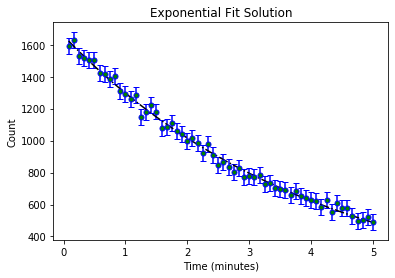

In [3]:
from pylab import *
from scipy.optimize import curve_fit
import math

# Exponential curve definition
def exponential(x,a,b):
    y=a*math.e**(-1*x/b)
    return y

# Load data
x,y = loadtxt("decay.txt",unpack=True)

# Make a guess as to what the parameters should be
guess = array([1650,4])

# Perform the curve fit and separate variables
parameters,covariance = curve_fit(exponential,x,y,p0=guess,sigma=None)
a = parameters[0]
b = parameters[1]
da = sqrt(covariance[0,0])
db = sqrt(covariance[1,1])

# Print parameter data
print("initial value = %0.3f +/- %0.3f" % (a,da))
print("exponent = %0.3f +/- %0.3f" % (b,db))

# Create list for size of each error bar
yerrors = array([50.0 for j in range(len(x))])

# Place the error bars on the graph
errorbar(x,y,yerr=yerrors,fmt='bo',ms=5,capsize=3,mfc='g')
    
# Plot the graph
plot(x,exponential(x,parameters[0],parameters[1]),'k-.')
title('Exponential Fit Solution')
xlabel('Time (minutes)')
ylabel('Count')
show()

It was determined that the initial value was approximately 1660 and that b was equal to 4.092. Therefore, the half-life can be approximated to be:

        b = t_(1/2)/(ln(2))
        t_(1/2) = b×ln(2)
        t_(1/2) = 4.092 ± 0.047×ln(2)
        t_(1/2) = 2.84 ± 0.033 minutes

Compared to the value of 2.6 minutes, which is the actual half-life of Barium 137, the data and curve fit produce a small amount of error.


## Exercise 4: Challenge!!!!!!!!!!!

A sinusoidal curve fit was used to describe the position of a magnetic rotor in a fixed magnetic field. The situation can be modeled using the equation:

    y = y_init × e^(-βx) x cos(ωx+φ_hor) + φ_vert

    where 
    y_init is the initial angle, 
    β is the damping constant, 
    ω is the resonant frequency, 
    φ_hor is the horizontal shift and 
    φ_vert is the vertical shift.

Initial guesses were made to be 2, 0.5, 3.5, 0, and -0.5, respectively for each of the parameters described above. These guesses are important because they help the computer optimize a highly complex function with multiple parameters faster and more effectively. 

The curve fit for the sinusoidal data is shown below, where each parameter was determined to be as labeled.

damping constant = 0.528 +/- 0.003
resonant frequency = 3.801 +/- 0.004
initial angle = 2.174 +/- 0.009
horizontal shift = -0.444 +/- 0.005
vertical shift = -0.763 +/- 0.002


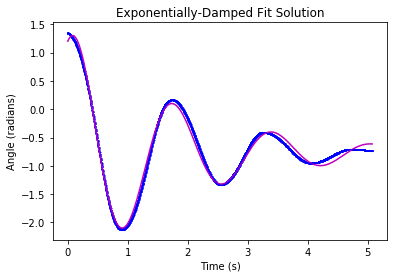

In [2]:
from pylab import *
from scipy.optimize import curve_fit
import math

# Exponential curve definition
def exp_damp(x,beta,omega,y_init,phi_hor,phi_vert):
    y = y_init*math.e**(-1*beta*x)*cos(omega*x+phi_hor)+phi_vert
    return y

# Load data
x,y = loadtxt("damped_oscillation.txt",unpack=True)

# Make a guess as to what the parameters should be
guess = array([0.5,3.5,2,0,-0.5])

# Perform the curve fit and separate variables
parameters,covariance = curve_fit(exp_damp,x,y,p0=guess,sigma=None)
beta = parameters[0]
omega = parameters[1]
y_init = parameters[2]
phi_hor = parameters[3]
phi_vert = parameters[4]

dbeta = sqrt(covariance[0,0])
domega = sqrt(covariance[1,1])
dy_init = sqrt(covariance[2,2])
dphi_hor = sqrt(covariance[3,3])
dphi_vert = sqrt(covariance[4,4])

# Print parameter data
print("damping constant = %0.3f +/- %0.3f" % (beta,dbeta))
print("resonant frequency = %0.3f +/- %0.3f" % (omega,domega))
print("initial angle = %0.3f +/- %0.3f" % (y_init,dy_init))
print("horizontal shift = %0.3f +/- %0.3f" % (phi_hor,dphi_hor))
print("vertical shift = %0.3f +/- %0.3f" % (phi_vert,dphi_vert))

# Create list for size of each error bar
yerrors = array([0.01 for j in range(len(x))])

# Place the error bars on the graph
errorbar(x,y,yerr=yerrors,fmt='bo',ms=0.05,capsize=1,mfc='g')
    
# Plot the graph
plot(x,exp_damp(x,beta,omega,y_init,phi_hor,phi_vert),'m-')
title('Exponentially-Damped Fit Solution')
xlabel('Time (s)')
ylabel('Angle (radians)')
show()

Therefore, the damping constant is approximately 0.528 and the resonant frequency is around 3.801.